In [128]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.preprocessing import LabelEncoder

df_exp = pd.read_csv(r"C:\Users\coys7\Apartments_prices\final_2.csv")

df_exp

,address,prices,Rooms,Square_in_m^2,floor,Type,Year,District,Floor,Total Floors
0,Аль-Фараби,70000000,3,91.8,8/12,монолитный дом,1990,Бостандыкский р-н,8,12
1,Шевченко 154 — Муканова,97000000,3,129.0,7/18,монолитный дом,2008,Алмалинский р-н,7,18
2,мкр Рахат 6/1 — Байжанов,7700000,1,32.1,1/1,кирпичный дом,1979,Алатауский р-н,1,1
3,Бузурбаева 17 — Ниже Гоголя,44000000,2,67.0,4/4,кирпичный дом,1968,Медеуский р-н,4,4
4,"мкр 13-й военный городок, Суюнбая 292/1 — 16 ...",37500000,3,90.0,2/2,кирпичный дом,1974,Турксибский р-н,2,2
...,...,...,...,...,...,...,...,...,...,...
14276,Назарбаева 223 — Назарбаева Ганди,285000000,5,168.0,5/12,монолитный дом,2013,Медеуский р-н,5,12
14277,Брусиловского 163,90000000,3,118.0,12/20,монолитный дом,2011,Алмалинский р-н,12,20
14278,Назарбаева 274 — Хаджимукана,55500000,3,63.0,1/4,кирпичный дом,1966,Медеуский р-н,1,4
14279,Байкенова 7 — Вверх по Асанбай Аскарова,46400000,2,58.0,4/7,кирпичный дом,2018,Бостандыкский р-н,4,7


In [129]:
# sns.displot(df_exp['prices'], kde=True)
df_exp['prices'].value_counts()
count_area = 0
count_price = 0
for i in df_exp['Square_in_m^2']:
    if i > 250:
        count_area = count_area + 1
print(count_area)

for i in df_exp['prices']:
    if i > 300000000:
        count_price = count_price + 1
print(count_price)

28
17


<Axes: xlabel='prices', ylabel='Square_in_m^2'>

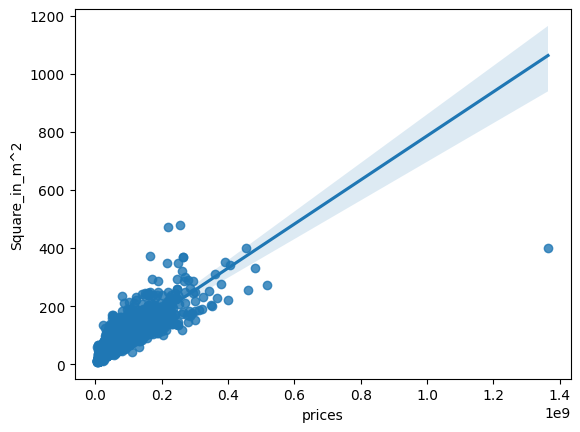

In [130]:
sns.regplot(x=df_exp['prices'], y=df_exp['Square_in_m^2'])

In [131]:
df_exp.drop(df_exp[df_exp['prices'] >= 300000000].index,inplace=True)
df_exp.drop(df_exp[df_exp['Square_in_m^2'] >= 250].index,inplace=True)

,address,prices,Rooms,Square_in_m^2,floor,Type,Year,District,Floor,Total Floors
0,Аль-Фараби,70000000,3,91.8,8/12,монолитный дом,1990,Бостандыкский р-н,8,12
1,Шевченко 154 — Муканова,97000000,3,129.0,7/18,монолитный дом,2008,Алмалинский р-н,7,18
2,мкр Рахат 6/1 — Байжанов,7700000,1,32.1,1/1,кирпичный дом,1979,Алатауский р-н,1,1
3,Бузурбаева 17 — Ниже Гоголя,44000000,2,67.0,4/4,кирпичный дом,1968,Медеуский р-н,4,4
4,"мкр 13-й военный городок, Суюнбая 292/1 — 16 ...",37500000,3,90.0,2/2,кирпичный дом,1974,Турксибский р-н,2,2
...,...,...,...,...,...,...,...,...,...,...
14276,Назарбаева 223 — Назарбаева Ганди,285000000,5,168.0,5/12,монолитный дом,2013,Медеуский р-н,5,12
14277,Брусиловского 163,90000000,3,118.0,12/20,монолитный дом,2011,Алмалинский р-н,12,20
14278,Назарбаева 274 — Хаджимукана,55500000,3,63.0,1/4,кирпичный дом,1966,Медеуский р-н,1,4
14279,Байкенова 7 — Вверх по Асанбай Аскарова,46400000,2,58.0,4/7,кирпичный дом,2018,Бостандыкский р-н,4,7


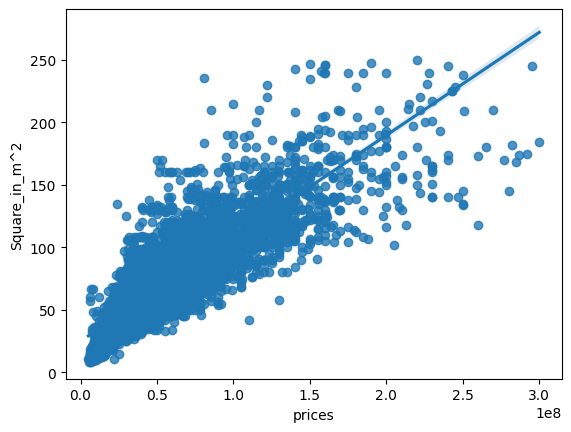

In [132]:
sns.regplot(x=df_exp['prices'], y=df_exp['Square_in_m^2'])
df_exp

In [133]:
all_dummies = pd.get_dummies(df_exp['District'])
all_dummies_Type = pd.get_dummies(df_exp['Type'])
df_exp_merged=df_exp.join(all_dummies)
df_exp_merged=df_exp_merged.join(all_dummies_Type)
df_exp_merged

,address,prices,Rooms,Square_in_m^2,floor,Type,Year,District,Floor,Total Floors,...,Алмалинский р-н,Ауэзовский р-н,Бостандыкский р-н,Жетысуский р-н,Медеуский р-н,Наурызбайский р-н,Турксибский р-н,кирпичный дом,монолитный дом,панельный дом
0,Аль-Фараби,70000000,3,91.8,8/12,монолитный дом,1990,Бостандыкский р-н,8,12,...,0,0,1,0,0,0,0,0,1,0
1,Шевченко 154 — Муканова,97000000,3,129.0,7/18,монолитный дом,2008,Алмалинский р-н,7,18,...,1,0,0,0,0,0,0,0,1,0
2,мкр Рахат 6/1 — Байжанов,7700000,1,32.1,1/1,кирпичный дом,1979,Алатауский р-н,1,1,...,0,0,0,0,0,0,0,1,0,0
3,Бузурбаева 17 — Ниже Гоголя,44000000,2,67.0,4/4,кирпичный дом,1968,Медеуский р-н,4,4,...,0,0,0,0,1,0,0,1,0,0
4,"мкр 13-й военный городок, Суюнбая 292/1 — 16 ...",37500000,3,90.0,2/2,кирпичный дом,1974,Турксибский р-н,2,2,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14276,Назарбаева 223 — Назарбаева Ганди,285000000,5,168.0,5/12,монолитный дом,2013,Медеуский р-н,5,12,...,0,0,0,0,1,0,0,0,1,0
14277,Брусиловского 163,90000000,3,118.0,12/20,монолитный дом,2011,Алмалинский р-н,12,20,...,1,0,0,0,0,0,0,0,1,0
14278,Назарбаева 274 — Хаджимукана,55500000,3,63.0,1/4,кирпичный дом,1966,Медеуский р-н,1,4,...,0,0,0,0,1,0,0,1,0,0
14279,Байкенова 7 — Вверх по Асанбай Аскарова,46400000,2,58.0,4/7,кирпичный дом,2018,Бостандыкский р-н,4,7,...,0,0,1,0,0,0,0,1,0,0


In [134]:
df_exp['Total Floors'].info()

<class 'pandas.core.series.Series'>
Int64Index: 14241 entries, 0 to 14280
Series name: Total Floors
Non-Null Count  Dtype
--------------  -----
14241 non-null  int64
dtypes: int64(1)
memory usage: 738.6 KB


In [135]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error, accuracy_score
from sklearn.model_selection import train_test_split

y = df_exp_merged.prices

features = ['Rooms','Square_in_m^2','Floor','Total Floors', 'Year', 'Бостандыкский р-н','Ауэзовский р-н','Наурызбайский р-н','Алмалинский р-н',
            'Алатауский р-н','Турксибский р-н','Медеуский р-н','Жетысуский р-н', 'кирпичный дом', 'монолитный дом','панельный дом']
x=df_exp_merged[features]

train_x, val_x, train_y, val_y = train_test_split(x, y, random_state=0)



rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(train_x, train_y)
rf_prediction = rf_model.predict(val_x)

rf_val_mae = mean_absolute_error (rf_prediction, val_y)

print("MAE of Random Forest Regressor on test set: {:.3f}".format(rf_val_mae))

MAE of Random Forest Regressor on test set: 6002113.473


In [136]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(rf_prediction, val_y)
print("MSE Random Forest Regressor: {:.3f}".format(MSE))

RMSE = mean_squared_error(rf_prediction, val_y, squared=False)
print ("RMSE Random Forest Regressor: {:.3f}".format(RMSE))

MSE Random Forest Regressor: 121482227730010.625
RMSE Random Forest Regressor: 11021897.647


In [137]:
from sklearn.metrics import mean_squared_log_error
MSLE_rf = mean_squared_log_error(rf_prediction, val_y)
print("MSLE Random Forest Regressor: {:.4%}".format(MSLE_rf))

MSLE Random Forest Regressor: 2.9829%


In [138]:
# train_x.dtypes
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(train_x, train_y)
xgb_prediction = xgb.predict(val_x)
xgb_val_mae = mean_absolute_error(xgb_prediction, val_y)
print("MAE XGBoost: {:.3f}".format(xgb_val_mae))
MSLE_xgb = mean_squared_log_error(xgb_prediction, val_y)
print("MSLE XGBoost: {:.4%}".format(MSLE_xgb))

MAE XGBoost: 5988693.858
MSLE XGBoost: 2.9195%


In [139]:
gnb = GaussianNB()
gnb.fit(train_x,train_y)
gnb_prediction = gnb.predict(val_x)
gnb_prediction_float = np.array(gnb_prediction, dtype=float)

gnb_val_mae = mean_absolute_error(gnb_prediction_float, val_y)
print("MAE Gaussian Naive Bayes: {:.3f}".format(gnb_val_mae))

MAE Gaussian Naive Bayes: 14477152.122


In [140]:
lr =LogisticRegression(max_iter = 1000)
lr.fit(train_x, train_y)
lr_prediction = lr.predict(val_x)
lr_prediction_float = np.array(lr_prediction, dtype=float)

lr_val_mae = mean_absolute_error(lr_prediction_float, val_y)
print("MAE Logistic Regression: {:.3f}".format(lr_val_mae))

MAE Logistic Regression: 10524194.632


c:\Users\coys7\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [141]:
dt = tree.DecisionTreeClassifier(random_state=0)
dt.fit(train_x,train_y)
dt_prediction = dt.predict(val_x)

dt_val_mae = mean_absolute_error(dt_prediction,val_y)
print("MAE Decision Tree Classifier: {:.3f}".format(dt_val_mae))

MAE Decision Tree Classifier: 7849129.422


In [142]:
knn = KNeighborsClassifier()
knn.fit(train_x,train_y)
knn_prediction = knn.predict(val_x)

knn_val_mae = mean_absolute_error(knn_prediction, val_y)
print("MAE K-nearest Neighbors: {:.3f}".format(knn_val_mae))

MAE K-nearest Neighbors: 10515047.517


In [143]:
svc = SVC (probability=True)
svc.fit(train_x,train_y)
svc_prediction = svc.predict(val_x)
svc_prediction_float = np.array(svc_prediction, dtype=float)

svc_val_mae = mean_absolute_error(svc_prediction,val_y)
print("MAE Support Vector Classification: {:.3f}".format(svc_val_mae))

MAE Support Vector Classification: 17969646.405


In [144]:
models = ["Random Forest Regressor", "XGBoost", "Gaussian Naive Bayes", "Logistic Regression", "Decision Tree Regressor", "K-nearest Neighbors", "Support Vector"]
tests_mae =[rf_val_mae, xgb_val_mae, gnb_val_mae, lr_val_mae, dt_val_mae, knn_val_mae, svc_val_mae]
compare_models = pd.DataFrame({"Algorithms": models, "MAE": tests_mae})
compare_models.sort_values(by = "MAE", ascending=True)

,Algorithms,MAE
1,XGBoost,5.988694e+06
0,Random Forest Regressor,6.002113e+06
4,Decision Tree Regressor,7.849129e+06
5,K-nearest Neighbors,1.051505e+07
3,Logistic Regression,1.052419e+07
2,Gaussian Naive Bayes,1.447715e+07
6,Support Vector,1.796965e+07


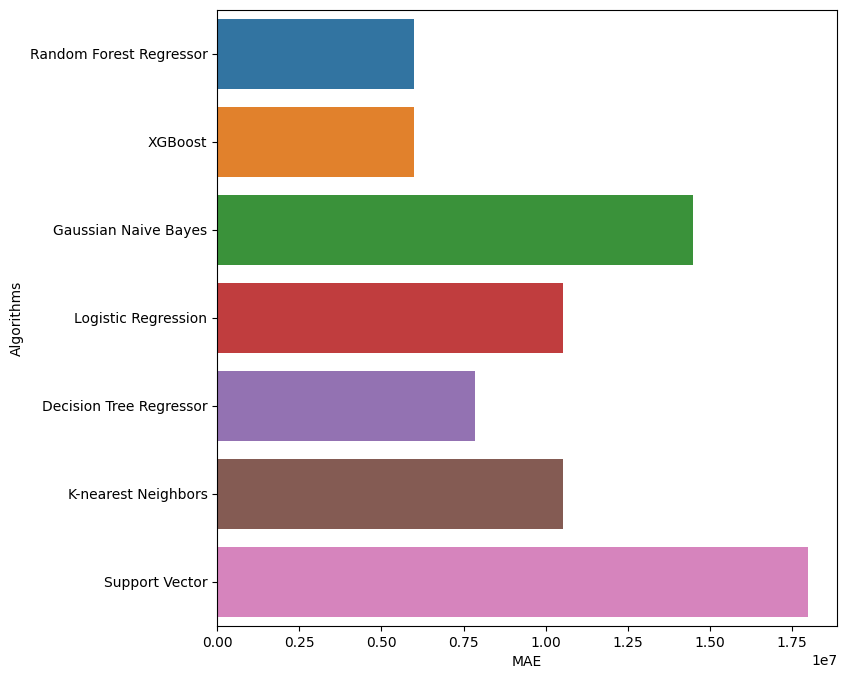

In [145]:
import matplotlib.pyplot as plt
plt.figure (figsize =(8,8))
sns.barplot(x = "MAE", y = "Algorithms", data = compare_models)
plt.show()

In [146]:
from sklearn.metrics import r2_score
score = r2_score(rf_prediction, val_y)
print (score)


0.8383381480490599


In [147]:
val_y1=val_y.copy()
gross =[]
for i in rf_prediction:
    gross.append(i)
df=pd.DataFrame(data=gross)
df = df.set_index(val_y.index)
df.rename(columns={0: "predicted"}, inplace=True)
df1=pd.concat([val_y1, df], axis=1)
df1.columns = ["true", "predicted"]
df1.head()

,true,predicted
3769,36000000,34034600.0
6467,25000000,23791000.0
221,43200000,49142000.0
6830,52500000,53862000.0
3277,50500000,55467000.0


In [148]:
df1['diff'] = df1['predicted'] - df1['true']
pd.DataFrame({'Count':[(df1['diff']<0).sum(),(df1['diff']==0).sum(),(df1['diff']>0).sum()]},columns=["Count"], index = ['Underestimation', 'Exact Estimation', 'Overestimation'])


,Count
Underestimation,1619
Exact Estimation,0
Overestimation,1942


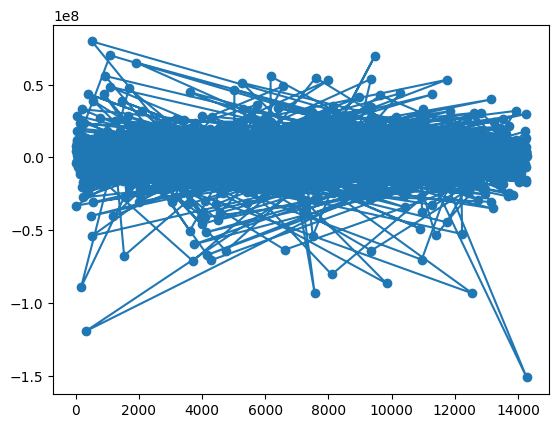

In [149]:
plt.plot('diff', data=df1, linestyle='-', marker='o')
plt.show()

In [150]:
df1.sort_values(by = "diff", ascending=True)

,true,predicted,diff
14276,285000000,1.338974e+08,-1.511026e+08
313,265000000,1.456102e+08,-1.193898e+08
7566,230000000,1.366232e+08,-9.337680e+07
12557,230000000,1.366232e+08,-9.337680e+07
174,200000000,1.109676e+08,-8.903240e+07
...,...,...,...
929,72000000,1.279362e+08,5.593616e+07
1919,140000000,2.050772e+08,6.507720e+07
9475,63500000,1.333037e+08,6.980366e+07
1091,107073249,1.771470e+08,7.007375e+07


<Axes: xlabel='diff', ylabel='true'>

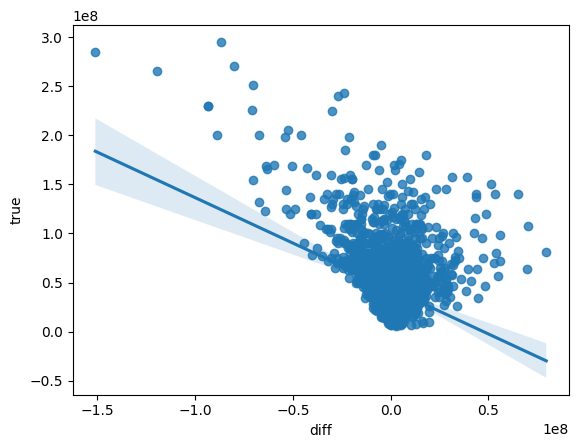

In [151]:
sns.regplot(x=df1['diff'], y=df1['true'])

In [152]:
df_merged=val_x.join(df1)
df_merged.sort_values(by = "diff", ascending=True)

,Rooms,Square_in_m^2,Floor,Total Floors,Year,Бостандыкский р-н,Ауэзовский р-н,Наурызбайский р-н,Алмалинский р-н,Алатауский р-н,Турксибский р-н,Медеуский р-н,Жетысуский р-н,кирпичный дом,монолитный дом,панельный дом,true,predicted,diff
14276,5,168.0,5,12,2013,0,0,0,0,0,0,1,0,0,1,0,285000000,1.338974e+08,-1.511026e+08
313,4,180.0,3,4,2006,1,0,0,0,0,0,0,0,0,1,0,265000000,1.456102e+08,-1.193898e+08
7566,4,165.0,2,3,2016,1,0,0,0,0,0,0,0,0,1,0,230000000,1.366232e+08,-9.337680e+07
12557,4,165.0,2,3,2016,1,0,0,0,0,0,0,0,0,1,0,230000000,1.366232e+08,-9.337680e+07
174,3,116.0,2,3,2016,1,0,0,0,0,0,0,0,0,1,0,200000000,1.109676e+08,-8.903240e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
929,3,148.3,1,9,2008,1,0,0,0,0,0,0,0,0,1,0,72000000,1.279362e+08,5.593616e+07
1919,4,208.0,3,6,2013,1,0,0,0,0,0,0,0,0,1,0,140000000,2.050772e+08,6.507720e+07
9475,2,121.4,12,12,2020,1,0,0,0,0,0,0,0,0,1,0,63500000,1.333037e+08,6.980366e+07
1091,4,188.5,8,8,2019,1,0,0,0,0,0,0,0,0,1,0,107073249,1.771470e+08,7.007375e+07


<Axes: xlabel='diff', ylabel='Square_in_m^2'>

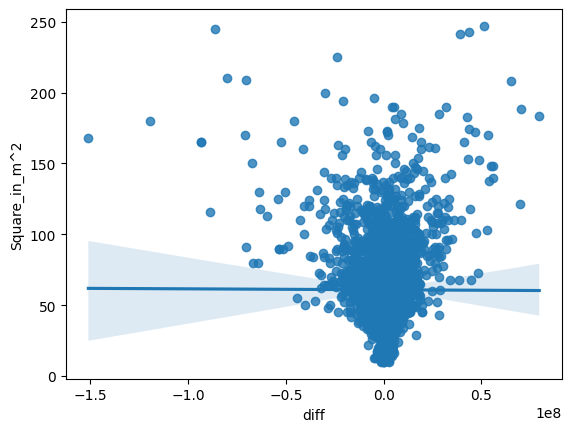

In [153]:
sns.regplot(x=df_merged['diff'], y=df_merged['Square_in_m^2'])

<Axes: xlabel='diff', ylabel='Rooms'>

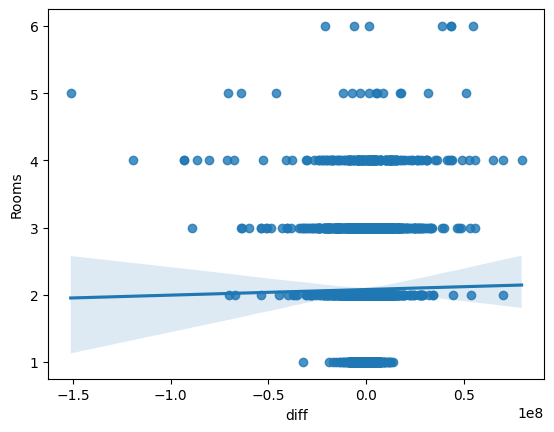

In [154]:
sns.regplot(x=df_merged['diff'], y=df_merged['Rooms'])

<Axes: xlabel='diff', ylabel='кирпичный дом'>

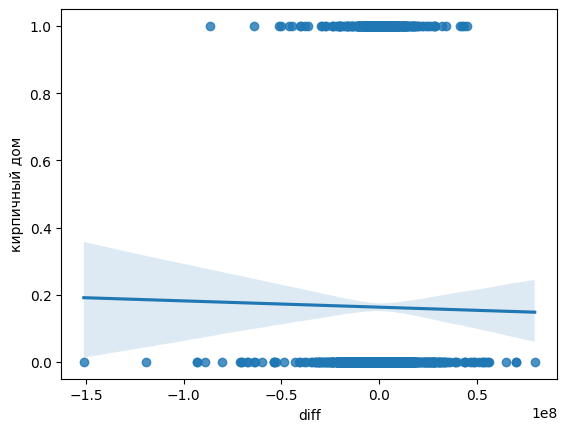

In [155]:
sns.regplot(x=df_merged['diff'], y=df_merged['кирпичный дом'])

In [156]:
from sklearn.metrics import median_absolute_error
MAbsE_rf = median_absolute_error(rf_prediction, val_y)
print("Mean Absolute Error of Random Forest Regressor: {:.3f}".format(rf_val_mae))
print("Median Absolute Error Random Forest Regressor: {:.3f}".format(MAbsE_rf))
print("MSLE Random Forest Regressor: {:.4%}".format(MSLE_rf))
print("MSE Random Forest Regressor: {:.3f}".format(MSE))
print ("RMSE Random Forest Regressor: {:.3f}".format(RMSE))

Mean Absolute Error of Random Forest Regressor: 6002113.473
Median Absolute Error Random Forest Regressor: 3317806.000
MSLE Random Forest Regressor: 2.9829%
MSE Random Forest Regressor: 121482227730010.625
RMSE Random Forest Regressor: 11021897.647


<Axes: xlabel='diff', ylabel='Rooms'>

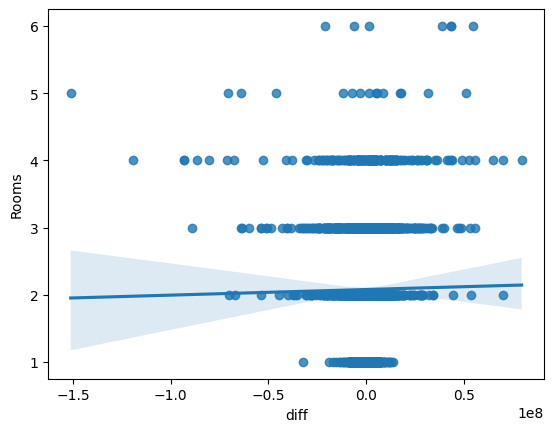

In [157]:
sns.regplot(x=df_merged['diff'], y=df_merged['Rooms'])